In [1]:
import torch
from torch import nn

import math 
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

### Preparing training data

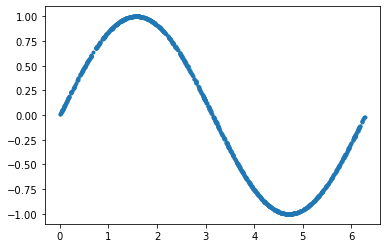

In [3]:
train_data_length = 1024

train_data      = torch.zeros((train_data_length,2))
train_data[:,0] = 2* math.pi * torch.rand(train_data_length)
train_data[:,1] = torch.sin(train_data[:,0])
train_labels    = torch.zeros(train_data_length)

train_set = [
    (train_data[i],train_labels[i]) for i in range(train_data_length)
]

plt.plot(train_data[:, 0], train_data[:, 1], ".")

### Data loader

In [4]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

### Discriminator

In [12]:
class Discriminator(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64,1),
            nn.Sigmoid()
        )
    
    def forward(self,x):
        output = self.model(x)
        return output

disc = Discriminator()

### Generator

In [13]:
class Generator(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32,2)
        )
    
    def forward(self,x):
        output = self.model(x)
        return output

gen = Generator()

### Learning parameters


In [14]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

### Optimizers


In [15]:
optimizer_discriminator = torch.optim.Adam(disc.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(gen.parameters(), lr=lr)

### Training

In [19]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # data for training discriminator 

        real_samples_labels     = torch.ones((batch_size,1))
        latent_space_samples    = torch.randn((batch_size,2)) 
        generated_samples       = gen(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size,1))
        all_samples             = torch.cat((real_samples,generated_samples))
        all_samples_labels      = torch.cat((real_samples_labels,generated_samples_labels))

        #training discriminator 

        disc.zero_grad()
        output_disc = disc(all_samples)
        loss_disc   = loss_function(output_disc, all_samples_labels)
        loss_disc.backward()
        optimizer_discriminator.step()

        # data for training the generator

        latent_space_samples    = torch.randn((batch_size,2))

        # training generator 

        gen.zero_grad()
        generated_samples           = gen(latent_space_samples)
        output_discriminator_gen    = disc(generated_samples) 

        loss_gen = loss_function( output_discriminator_gen , real_samples_labels)

        loss_gen.backward()
        optimizer_generator.step()

        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_disc}")
            print(f"Epoch: {epoch} Loss G.: {loss_gen}")  

print("DONE")      

Epoch: 0 Loss D.: 0.6574735641479492
Epoch: 0 Loss G.: 0.8250631093978882
Epoch: 10 Loss D.: 0.6873001456260681
Epoch: 10 Loss G.: 0.7132644057273865
Epoch: 20 Loss D.: 0.7288197875022888
Epoch: 20 Loss G.: 0.670069694519043
Epoch: 30 Loss D.: 0.7037545442581177
Epoch: 30 Loss G.: 0.6827520132064819
Epoch: 40 Loss D.: 0.6847429871559143
Epoch: 40 Loss G.: 0.6511781811714172
Epoch: 50 Loss D.: 0.6450986266136169
Epoch: 50 Loss G.: 0.7382488250732422
Epoch: 60 Loss D.: 0.6901654005050659
Epoch: 60 Loss G.: 0.730121374130249
Epoch: 70 Loss D.: 0.683338463306427
Epoch: 70 Loss G.: 0.7826579809188843
Epoch: 80 Loss D.: 0.7298794984817505
Epoch: 80 Loss G.: 0.775604784488678
Epoch: 90 Loss D.: 0.6013032793998718
Epoch: 90 Loss G.: 0.9611825346946716
Epoch: 100 Loss D.: 0.6943167448043823
Epoch: 100 Loss G.: 0.6817967891693115
Epoch: 110 Loss D.: 0.6823744773864746
Epoch: 110 Loss G.: 0.7300504446029663
Epoch: 120 Loss D.: 0.6651846766471863
Epoch: 120 Loss G.: 0.7315941452980042
Epoch: 130 L

### Testing results

before detaching tensor([[ 4.4910, -0.9843],
        [ 1.0746,  0.9194],
        [ 4.2506, -0.8911],
        [ 3.9366, -0.7185],
        [ 5.6095, -0.5985],
        [ 3.9288, -0.7149],
        [ 5.7182, -0.2271],
        [ 5.6953, -0.4995],
        [ 5.1129, -0.9320],
        [ 1.1591,  0.9539],
        [ 5.7373, -0.1758],
        [ 4.1392, -0.8384],
        [ 0.7861,  0.7329],
        [ 3.3187, -0.1428],
        [ 1.9264,  0.9930],
        [ 5.1248, -0.9368],
        [ 4.9726, -0.9759],
        [ 4.3389, -0.9358],
        [ 2.7951,  0.3404],
        [ 5.9150, -0.1125],
        [ 3.3658, -0.2154],
        [ 1.1878,  0.9662],
        [ 4.9064, -1.0013],
        [ 3.9587, -0.7375],
        [ 5.7226, -0.5421],
        [ 3.3410, -0.1929],
        [ 3.0979,  0.0504],
        [ 3.4496, -0.2931],
        [ 1.0074,  0.8772],
        [ 5.6279, -0.7478],
        [ 5.0108, -0.9655],
        [ 5.2269, -0.9069],
        [ 3.7436, -0.5685],
        [ 4.1437, -0.8666],
        [ 4.5301, -1.0031],
   

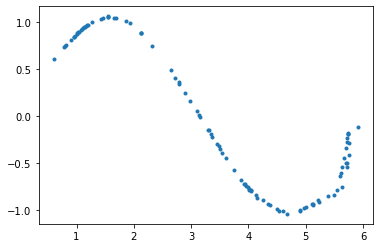

In [20]:
latent_space_samples = torch.randn(100, 2)
generated_samples = gen(latent_space_samples)

generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

### Generating hand written numbers

In [22]:
import torchvision
import torchvision.transforms as transforms

device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [23]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

3.6%

100.1%

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


8.4%5%

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


100.4%

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


180.4%

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


In [24]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

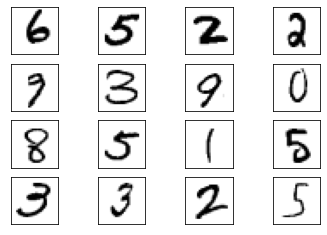

In [28]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

### MINST discriminator 

In [30]:
class DiscriminatorMINST(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784,1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,1),
            nn.Sigmoid()
        )
    
    def forward(self,x):
        x = x.view(x.size(0), 784) # vectorize
        output = self.model(x)
        return output

discMINST = DiscriminatorMINST().to(device=device) # to(device=device) - sends to gpu or cpu 

### Generator MINST

In [32]:
class GeneratorMINST(nn.Module):

    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100,256),
            nn.ReLU(),
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512,1024),
            nn.ReLU(),
            nn.Linear(1024,784),
            nn.Tanh() # to make output in range of -1 to 1
        )
    
    def forward(self,x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28) # change vector to matrix
        return output

genMINST = GeneratorMINST().to(device=device) # to(device=device) - sends to gpu or cpu

### Training MINST

In [33]:
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

optimizer_discMINST = torch.optim.Adam(discMINST.parameters(), lr=lr)
optimizer_genMINST  = torch.optim.Adam(genMINST.parameters(), lr=lr)

for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples            = real_samples.to(device=device)
        real_samples_labels     = torch.ones((batch_size, 1)).to(device=device)
        latent_space_samples    = torch.randn((batch_size, 100)).to(device=device)
        
        generated_samples        = genMINST(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(device=device)
       
        all_samples         = torch.cat((real_samples, generated_samples))
        all_samples_labels  = torch.cat((real_samples_labels, generated_samples_labels))

        # Training the discriminator
        discMINST.zero_grad()
        output_discriminator = discMINST(all_samples)

        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        
        optimizer_discMINST.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(device=device)

        # Training the generator
        genMINST.zero_grad()
        generated_samples = genMINST(latent_space_samples)

        output_discriminator_generated = discMINST(generated_samples)
        loss_generator = loss_function( output_discriminator_generated, real_samples_labels )
        
        loss_generator.backward()
        optimizer_genMINST.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")